# ラビットチャレンジ　機械学習


## 1. 線形回帰モデル
最小二乗法で用いられる方法で、計測等で得られた入力値から出力値を予測する。

m 回の計測を行い、
$$
Y = \left(
  \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_m \end{array}
\right)
$$
および、
$$
X = ((x_{11}, x_{21}, \dots, x_{n1}), (x_{12}, x_{22}, \dots, x_{n2}), \dots, (x_{m1}, x_{m2}, \dots, x_{nm}))
$$
が得られたとする。

y と $x_1, x_2 \dots x_n$との間に

$$
y= \beta_0 + \beta_1 x_1 + \beta_2 x_2 \dots \beta_n + \epsilon
$$

なる関係を仮定すると、（$ \epsilon $ は誤差)

$$
\left[
  \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_m \end{array}
\right] =
\begin{bmatrix}
  \ 1 &         x_{11} &  \dots &     x_{n1} \\
          1 & x_{12} &  \dots &         x_{n2} \\
     \vdots &    \vdots & \ddots &    \vdots \\
          1 &         x_{1n} &  \dots & x_{nm}
\end{bmatrix}
\left[
  \begin{array}{c} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_m \end{array}
\right] + 
\left[
  \begin{array}{c} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_m \end{array}
\right]
$$

$$
Y = X \vec{\beta} + \vec{\epsilon}
$$
であるので、$ \epsilon $ の二乗誤差(SSE)は

$$
SSE = \epsilon^T \epsilon = (Y - X \beta)^T (Y-X\beta) = Y^TY- 2 \beta^T X^T Y + \beta^T X^T X^T \beta
$$
となる。$ \beta $を変化させたときのSSE の最小値は

$$
{\partial (SSE) \over {\partial \beta^T}} = -2 X^T Y + 2 X^T X \beta = 0
$$
$ \beta $ について解くと、
$$
\beta = (X^T X)^{-1} X^T Y
$$
となり、解析的に解くことができる。


### ハンズオン

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# 乱数で x, y を生成
from sklearn import datasets
x, y = datasets.make_regression(n_samples=100, 
                       n_features=1,
                       n_informative=1,
                       noise=2.0)

In [17]:
x, y

(array([[-2.06330356e-02],
        [ 1.61124545e+00],
        [ 1.40537117e+00],
        [ 1.02675994e+00],
        [-1.77660137e-01],
        [ 1.48017548e-01],
        [ 4.72987392e-01],
        [-3.12243632e-01],
        [-4.95580033e-01],
        [ 8.95920631e-01],
        [-3.27701653e-01],
        [-5.77674665e-01],
        [ 6.66911292e-02],
        [ 1.15025984e+00],
        [-1.35701966e+00],
        [ 1.25556837e+00],
        [-1.20484330e-01],
        [ 4.40840244e-01],
        [ 7.16643768e-01],
        [ 1.43446138e-03],
        [-1.14863302e-02],
        [ 2.84300789e-01],
        [-1.01660024e-01],
        [ 5.39439693e-01],
        [ 2.40818287e-01],
        [ 4.07460231e-01],
        [-7.81305186e-01],
        [ 2.16743237e-01],
        [-1.04704777e-01],
        [ 1.28082446e+00],
        [-1.03852595e+00],
        [ 2.01863146e+00],
        [-6.34046808e-01],
        [-3.12438493e-01],
        [ 1.26045434e+00],
        [ 1.18158586e+00],
        [ 2.81546905e+00],
 

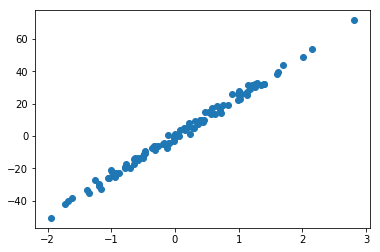

In [18]:
plt.scatter(x,y)

$$
X= 
\begin{bmatrix}
 \ 1 &         x_{11} &  \dots &     x_{n1} \\
          1 & x_{12} &  \dots &         x_{n2} \\
     \vdots &    \vdots & \ddots &    \vdots \\
          1 &         x_{1n} &  \dots & x_{nm}
\end{bmatrix}
$$
を作成

In [19]:
o=np.ones(x.shape)

In [20]:
X=np.hstack((o,x))

$$
\beta = (X^T X)^{-1} X^T Y
$$
を計算

In [21]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

In [22]:
xx = np.linspace(np.min(x), np.max(x),100)
yy = beta[1]*xx+beta[0]

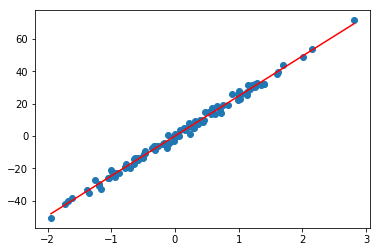

In [23]:
plt.scatter(x,y)
plt.plot(xx,yy, c='red')

In [24]:
xx

array([-1.9481959 , -1.90007807, -1.85196024, -1.80384242, -1.75572459,
       -1.70760676, -1.65948893, -1.61137111, -1.56325328, -1.51513545,
       -1.46701762, -1.41889979, -1.37078197, -1.32266414, -1.27454631,
       -1.22642848, -1.17831066, -1.13019283, -1.082075  , -1.03395717,
       -0.98583934, -0.93772152, -0.88960369, -0.84148586, -0.79336803,
       -0.74525021, -0.69713238, -0.64901455, -0.60089672, -0.5527789 ,
       -0.50466107, -0.45654324, -0.40842541, -0.36030758, -0.31218976,
       -0.26407193, -0.2159541 , -0.16783627, -0.11971845, -0.07160062,
       -0.02348279,  0.02463504,  0.07275287,  0.12087069,  0.16898852,
        0.21710635,  0.26522418,  0.313342  ,  0.36145983,  0.40957766,
        0.45769549,  0.50581332,  0.55393114,  0.60204897,  0.6501668 ,
        0.69828463,  0.74640245,  0.79452028,  0.84263811,  0.89075594,
        0.93887377,  0.98699159,  1.03510942,  1.08322725,  1.13134508,
        1.1794629 ,  1.22758073,  1.27569856,  1.32381639,  1.37

## 2.非線形回帰

上記では、説明変数と被説明変数の間に
$$
y= \beta_0 + \beta_1 x_1 + \beta_2 x_2 \dots \beta_n + \epsilon
$$
のような線形関係があるとしていたところを、任意の関数 $ \phi(x) $を用いて

$$
y = w_0 + \sum w_i \phi_i(x)
$$
なる関係があるものとする。

### 基底関数
$ \phi_i(x) $ は基底関数と呼ばれ、

$$
\phi_i(x) = x^i
$$
とすると、n 次元多項式となる。

その他よく用いられるものとしてはガウス基底がある。

$$
\phi(x) = exp({-(x - \mu_i)^2 \over 2 \sigma^2})
$$

### 過学習

n を無条件に大きくすると、特定のデータ（学習データ）にはよくフィットするが、
未学習データ（テストデータ等）では過学習が発生する。



In [25]:
N=20
x=np.linspace(-3,3,N)
y=np.sin(x)+ np.random.rand(N)-0.5
x=x.reshape(N,-1)
y=y.reshape(N,-1)

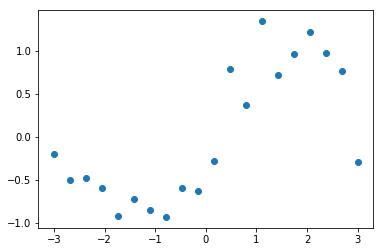

In [26]:
plt.scatter(x,y)

#### 多項式カーネル(N=3)

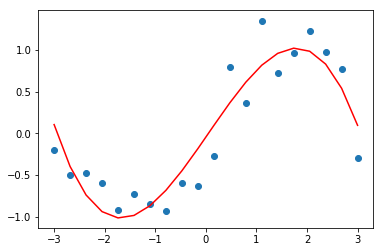

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
polynomial_features = PolynomialFeatures(degree = 3)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
plt.scatter(x,y)
plt.plot(x,y_pred,c='r')

#### 多項式カーネル(N=11)

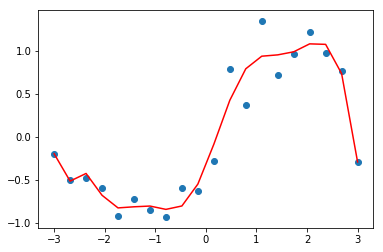

In [28]:
polynomial_features = PolynomialFeatures(degree = 11)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
plt.scatter(x,y)
plt.plot(x,y_pred,c='r')

#### N=15

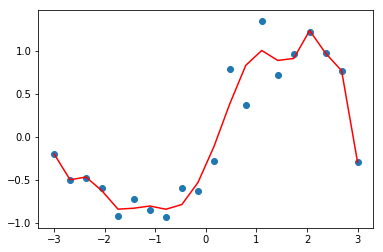

In [29]:
polynomial_features = PolynomialFeatures(degree = 15)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
plt.scatter(x,y)
plt.plot(x,y_pred,c='r')

#### ガウシアンカーネル

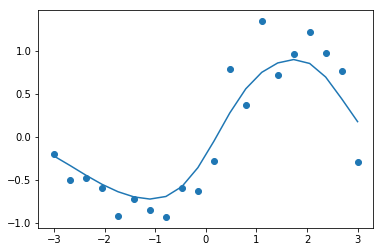

In [30]:
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha=1.0, kernel='rbf')
clf.fit(x, y)

p = clf.predict(x)
plt.scatter(x, y)
plt.plot(x, p)


### 正則化

回帰は真値と予測値の誤差

$$
L = |y - X w|^2
$$
を最小化する問題であるが、学習データに過度に一致させようとすると、
上記のような過学習が起こる。これを防ぐため、誤差を最小化する代わりに、

$$
L = |y - X w |^2 + \lambda |w|_n
$$

を最小化する問題に置き換える。
この時n = 1 の場合を L1正則化(ラッソ回帰)、n=2の場合を L2正則化(リッジ回帰)と呼ぶ。


## 3.ロジスティック回帰

説明変数に対する出力が値ではなく、～である確率であるもの。
例えば、

* 患者が罹患している確率（2値分類）
* 入力された画像がどの動物である可能性が高いか（多値分類）

に対して、回帰を行う。
結果は、被説明変数が、真か偽か（2値）、あるクラスに属する確率は各々幾らか（多値）という形で出力される。



### 2値のテスト

体温に対して、風邪か(1)、そうでないか(0)を下記のようにあらわした場合、単純にフィッティングを行っても意味をなさない。


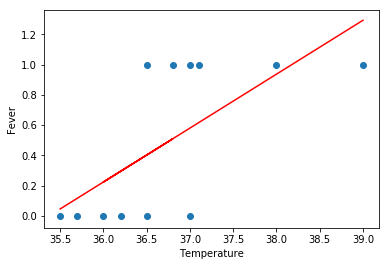

In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df=pd.DataFrame([
    [35.5, 0],
    [35.7, 0],
    [36.2, 0],
    [36.5, 0],
    [36.5, 1],
    [36.8, 1],
    [36.0, 0],
    [37.0, 1],
    [37.0, 0],
    [37.1, 1],
    [38.0, 1],
    [39.0, 1]],
    columns = ['temperature','fever'])
x=df['temperature'].values
y=df['fever'].values
plt.xlabel('Temperature')
plt.ylabel('Fever')
plt.scatter(x,y)

clf = LinearRegression()
x=x.reshape(-1,1)
clf.fit(x,y)
y_=clf.predict(x)
plt.plot(x,y_,c='r')

このデータに対し、直接線形回帰を行っても、妥当なフィッティングは得れれない。
そこで、熱である確率を p とし
$$ 
p = {1 \over 1 + exp(-z)} 
$$
とおき、熱かそうでないかを確率で表現する。
この時の
$$
z = \log ({p \over {1-p}})
$$
を対数オッズ(ロジット）と呼ぶ
ここで、
$$
z=\beta_0 + \beta_1 t
$$
とおくと、線形回帰が使える。
$ p \rightarrow 0 $ の時、$ z \rightarrow - \infty $ <br />
$ p  \rightarrow 1 $  の時、$ z \rightarrow \infty $ <br />
であるが、ここでは、p=0の時 z=-10, p=1の時 z=10と置く。



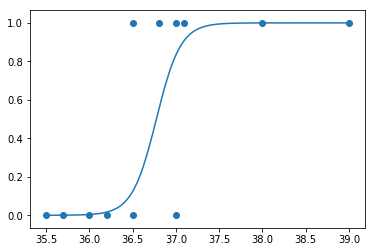

In [32]:
z=y*20-10.0
clf.fit(x,z)
x_=np.arange(35.5, 39.0, 0.02).reshape(-1,1)
z_=clf.predict(x_)
plt.scatter(x,y)
plt.plot(x_,1/(1+np.exp(-z_)))

このように体温に応じて風邪である確率分布が得られた。

多値分類の場合は、クラスkに属する確率を
$$
p_k = {exp(\beta_0^{(k)} + x \beta^{(k))} \over \sum_j exp(\beta_0^{(j)} + x \beta^{(j)})}
$$
とソフトマトリックス関数を導入することで、回帰を行うことができる。

## 4.主成分分析

主成分分析は多くの説明変数をより少ない指標や合成変数であらわす方法。
これにより多くの次元データを、2次元や3次元といった低次元であらわすことが
可能となり、視覚的に理解しやすくなる。

例えば、下記のように2次元に分布した分布を、
分散の大きな方法に座標回転を行うことより、1つの次元だけで分布の分散をよく表すことができる。
<img src="PCA_1.jpg">

具体的には、
$$
\vec{X} = \begin{bmatrix}X_1 \\ X_2 \\ \vdots \\ X_n \end{bmatrix}
$$
に対して、共分散行列と呼ばれる以下の行列
$$
\Sigma
= \begin{bmatrix}
 \mathrm{E}[(X_1 - \mu_1)(X_1 - \mu_1)] & \mathrm{E}[(X_1 - \mu_1)(X_2 - \mu_2)] & \cdots & \mathrm{E}[(X_1 - \mu_1)(X_n - \mu_n)] \\ \\
 \mathrm{E}[(X_2 - \mu_2)(X_1 - \mu_1)] & \mathrm{E}[(X_2 - \mu_2)(X_2 - \mu_2)] & \cdots & \mathrm{E}[(X_2 - \mu_2)(X_n - \mu_n)] \\ \\
 \vdots & \vdots & \ddots & \vdots \\ \\
 \mathrm{E}[(X_n - \mu_n)(X_1 - \mu_1)] & \mathrm{E}[(X_n - \mu_n)(X_2 - \mu_2)] & \cdots & \mathrm{E}[(X_n - \mu_n)(X_n - \mu_n)]
\end{bmatrix}
$$
を対角化し、大きな固有値に対応する、少数の固有ベクトル空間
にマッピングを行うことで、次元の縮約が行える。


#### その他
特異値分解とよく似ている

#### ハンズオン


In [33]:
n_sample = 100

def gen_data(n_sample):
    mean = [0, 0]
    cov = [[2, 0.7], [0.7, 1]]
    return np.random.multivariate_normal(mean, cov, n_sample)

def plt_data(X):
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

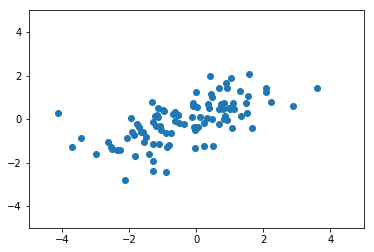

In [34]:
X = gen_data(n_sample)
plt_data(X)

In [35]:
n_components=2

def get_moments(X):
    mean = X.mean(axis=0)
    stan_cov = np.dot((X - mean).T, X - mean) / (len(X) - 1)
    return mean, stan_cov
    
def get_components(eigenvectors, n_components):
#     W = eigenvectors[:, -n_components:]
#     return W.T[::-1]
    W = eigenvectors[:, ::-1][:, :n_components]
    return W.T

def plt_result(X, first, second):
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    # 第１主成分
    plt.quiver(0, 0, first[0], first[1], width=0.01, scale=6, color='red')
    # 第２主成分
    plt.quiver(0, 0, second[0], second[1], width=0.01, scale=6, color='green')

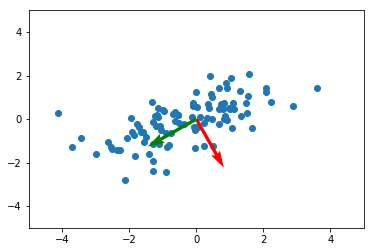

In [36]:
#分散共分散行列を標準化
meean, stan_cov = get_moments(X)
#固有値と固有ベクトルを計算
eigenvalues, eigenvectors = np.linalg.eigh(stan_cov)
components = get_components(eigenvectors, n_components)

plt_result(X, eigenvectors[0, :], eigenvectors[1, :])

## 5.アルゴリズム

### k-means
教師なしのクラスタリング問題。
正解ラベルのないデータに対して、それぞれのデータがどのクラスにラベル化されるかを
分ける方法。


アルゴリズム概略
* クラス数k はあらかじめ与えられている。
* ランダムな位置にクラスタの重心を決める
* 各クラスに対して、各点のデータと重心位置の距離を計算し、クラスタ重心を求める。
* 各点を一番近いクラスタに割り当てる

k-means ではランダムで重心を決めているため、初期値の取り方によっては、収束がうまく行かないことがある。
これを改良した方法として k-means++ がある。これは、クラスの重心を下記の重み付きの確率分布を用いて、ランダムに決める。
$$
{D(x)^2 \over \sum D(x)^2}
$$




In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def gen_data():
    x1 = np.random.normal(size=(100, 2)) + np.array([-5, -5])
    x2 = np.random.normal(size=(100, 2)) + np.array([5, -5])
    x3 = np.random.normal(size=(100, 2)) + np.array([0, 5])
    return np.vstack((x1, x2, x3))

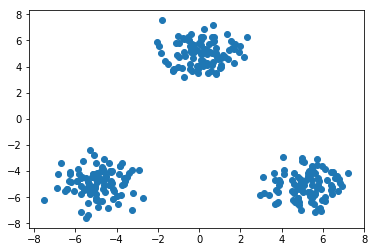

In [39]:
#データ作成
X_train = gen_data()
#データ描画
plt.scatter(X_train[:, 0], X_train[:, 1])

In [40]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

n_clusters = 3
iter_max = 100

# 各クラスタ中心をランダムに初期化
centers = X_train[np.random.choice(len(X_train), n_clusters, replace=False)]

for _ in range(iter_max):
    prev_centers = np.copy(centers)
    D = np.zeros((len(X_train), n_clusters))
    # 各データ点に対して、各クラスタ中心との距離を計算
    for i, x in enumerate(X_train):
        D[i] = distance(x, centers)
    # 各データ点に、最も距離が近いクラスタを割り当
    cluster_index = np.argmin(D, axis=1)
    # 各クラスタの中心を計算
    for k in range(n_clusters):
        index_k = cluster_index == k
        centers[k] = np.mean(X_train[index_k], axis=0)
    # 収束判定
    if np.allclose(prev_centers, centers):
        break

In [41]:
def plt_result(X_train, centers, xx):
    #　データを可視化
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred, cmap='spring')
    # 中心を可視化
    plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X', lw=2, c='black', edgecolor="white")
    # 領域の可視化
    pred = np.empty(len(xx), dtype=int)
    for i, x in enumerate(xx):
        d = distance(x, centers)
        pred[i] = np.argmin(d)

In [42]:
y_pred = np.empty(len(X_train), dtype=int)
for i, x in enumerate(X_train):
    d = distance(x, centers)
    y_pred[i] = np.argmin(d)

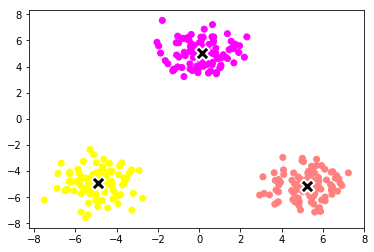

In [43]:
xx0, xx1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

plt_result(X_train, centers, xx)

### k近傍法

教師あり学習の分類問題。

特徴空間において、ある点がどこクラスに属するかという茂大を、近傍の k 個の教師データを選び、
多数決によりその点が属するクラスを決定する方法。


#### ハンズオン

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [45]:
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    x_train = np.concatenate([x0, x1])
    y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return x_train, y_train

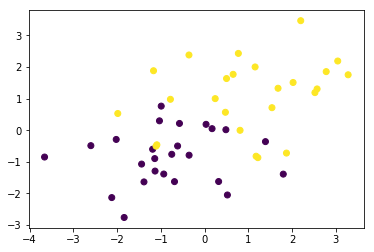

In [46]:
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

In [47]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

def knc_predict(n_neighbors, x_train, y_train, X_test):
    y_pred = np.empty(len(X_test), dtype=y_train.dtype)
    for i, x in enumerate(X_test):
        distances = distance(x, X_train)
        nearest_index = distances.argsort()[:n_neighbors]
        mode, _ = stats.mode(y_train[nearest_index])
        y_pred[i] = mode
    return y_pred

def plt_resut(x_train, y_train, y_pred):
    xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
    xx = np.array([xx0, xx1]).reshape(2, -1).T
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
    plt.contourf(xx0, xx1, y_pred.reshape(100, 100).astype(dtype=np.float), alpha=0.2, levels=np.linspace(0, 1, 3))

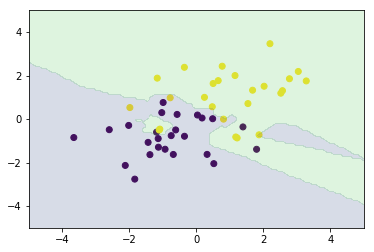

In [48]:
n_neighbors = 3

xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
X_test = np.array([xx0, xx1]).reshape(2, -1).T

y_pred = knc_predict(n_neighbors, X_train, ys_train, X_test)
plt_resut(X_train, ys_train, y_pred)

## 6.SVM

サポートベクターマシン (SVM) とは、教師あり学習で用いられる、分類器
特徴量空間において、ある点がどのクラスに属するかを決定する際、
各クラスを超平面によって分類し、その点がどの超平面に囲まれた場所にあるかに
よってクラス分類を行う。

学習は、クラスを分離する超平面を、各クラスに属する点からの距離が最大に
なるように行う。

<img src="SVM_1.jpg">

学習データを
$$
(x_1, y_1), (x_2, y_2), \dots (x_n, y_n)
$$
とすると、2つのクラスに分離する、超平面の境界は
$$
W^T x - b = 0
$$
で表される。
平面からの距離は
$$
{b \over \|\mathbf{w}\|}
$$
である。

#### ハードマージン
学習データが線形分離可能であるとき、なるべくその距離が大きくなるように、2 つのクラスのデータを分離するような、2 つの平行な超平面を選択することができ、
それらは、
$$
W^T x - b = 1
$$
および、
$$
W^T x - b = -1
$$
となる。このとき
$$
y_i(W^T x_i - b) \ge 1
$$
が成立することから、2つのクラスを分離する超平面は、
$$
y_i(W^T x_i - b) \ge 1
$$
の元で $\|\mathbf{w}\|$を最小化する問題に帰する。

#### ソフトマージン
線形分離不可能な場合は、
$$
\left[\frac 1 n \sum_{i=1}^n \max\left(0, 1 - y_i(\mathbf{w}^T \mathbf{x}_i - b)\right) \right] + \lambda\lVert \mathbf{w} \rVert^2
$$
を最小化することによって得られる。$ \lambda $ は、x_i がどの程度、正しい方に分類されているかと、マージンの大きさのトレードオフを決定するパラメタとなる。

### ハンズオン
#### 線形分離可能

データ生成

In [49]:
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 2.
    x1 = np.random.normal(size=50).reshape(-1, 2) + 2.
    X_train = np.concatenate([x0, x1])
    ys_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return X_train, ys_train

In [50]:
t = np.where(Y_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# 線形カーネル
K = X_train.dot(X_train.T)

C = 1
eta1 = 0.01
eta2 = 0.001
n_iter = 1000

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.clip(a, 0, C)

NameError: name 'Y_train' is not defined

In [51]:
t = np.where(Y_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# 線形カーネル
K = X_train.dot(X_train.T)

C = 1
eta1 = 0.01
eta2 = 0.001
n_iter = 1000

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.clip(a, 0, C)

NameError: name 'Y_train' is not defined

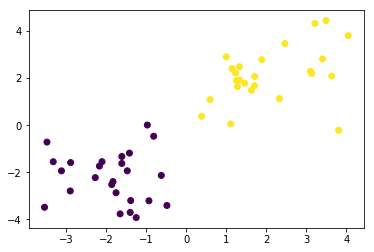

In [52]:
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

In [53]:
t = np.where(ys_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# 線形カーネル
K = X_train.dot(X_train.T)

eta1 = 0.01
eta2 = 0.001
n_iter = 500

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.where(a > 0, a, 0)

In [54]:
index = a > 1e-6
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

In [55]:
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * sv.dot(X_test[i])
y_pred = np.sign(y_project)

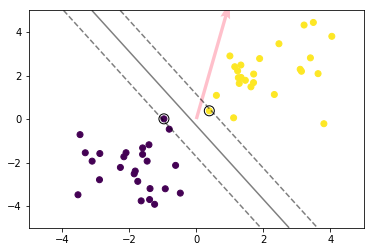

In [56]:
# 訓練データを可視化
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# 領域を可視化
#plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


# マージンと決定境界を可視化
plt.quiver(0, 0, 0.1, 0.35, width=0.01, scale=1, color='pink')

#### 線形分離不可能

データの生成

In [57]:
factor = .2
n_samples = 50
linspace = np.linspace(0, 2 * np.pi, n_samples // 2 + 1)[:-1]
outer_circ_x = np.cos(linspace)
outer_circ_y = np.sin(linspace)
inner_circ_x = outer_circ_x * factor
inner_circ_y = outer_circ_y * factor

X = np.vstack((np.append(outer_circ_x, inner_circ_x),
               np.append(outer_circ_y, inner_circ_y))).T
y = np.hstack([np.zeros(n_samples // 2, dtype=np.intp),
               np.ones(n_samples // 2, dtype=np.intp)])
X += np.random.normal(scale=0.15, size=X.shape)
x_train = X
y_train = y


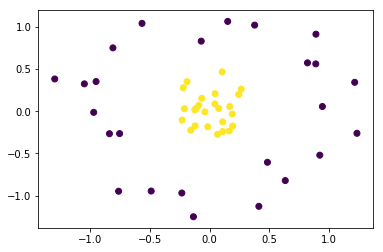

In [58]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

RBFカーネルの利用

In [59]:
def rbf(u, v):
        sigma = 0.8
        return np.exp(-0.5 * ((u - v)**2).sum() / sigma**2)
    
X_train = x_train
t = np.where(y_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# RBFカーネル
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = rbf(X_train[i], X_train[j])

eta1 = 0.01
eta2 = 0.001
n_iter = 5000

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.where(a > 0, a, 0)

予測

In [60]:
index = a > 1e-6
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()


In [61]:
xx0, xx1 = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * rbf(X_test[i], sv)
y_pred = np.sign(y_project)

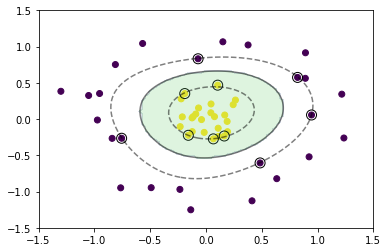

In [62]:
# 訓練データを可視化
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# 領域を可視化
plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

#### ソフトマージン

データがマージンの中に入ることを許容する

In [63]:
x0 = np.random.normal(size=50).reshape(-1, 2) - 1.
x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
x_train = np.concatenate([x0, x1])
y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)

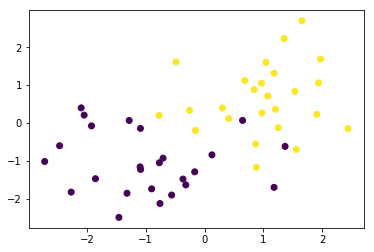

In [64]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

学習

In [65]:
X_train = x_train
t = np.where(y_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# 線形カーネル
K = X_train.dot(X_train.T)

C = 1
eta1 = 0.01
eta2 = 0.001
n_iter = 1000

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.clip(a, 0, C)

予測

In [66]:
index = a > 1e-8
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

In [67]:
X_train = x_train
t = np.where(y_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# 線形カーネル
K = X_train.dot(X_train.T)

C = 1
eta1 = 0.01
eta2 = 0.001
n_iter = 1000

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.clip(a, 0, C)

In [68]:
xx0, xx1 = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * sv.dot(X_test[i])
y_pred = np.sign(y_project)

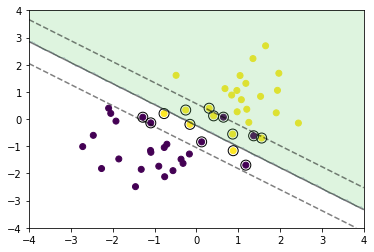

In [69]:
# 訓練データを可視化
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# 領域を可視化
plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])